# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [32]:
import pandas as pd
sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales
print(sales.query('sales > 10'))
print(sales.query('sales >13 & year==2018'))
print(sales.drop(sales.query('sales >13 & year==2018').index))
print(sales.query('(sales/3)>3'))
sales.query('employee.str[0] >"J"')


  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020
  employee  sales  year
0  Katrina     14  2018
     employee  sales  year
1      Guanyu     17  2019
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
7      Alaina     15  2020
8      Egweyn      5  2020
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020


,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
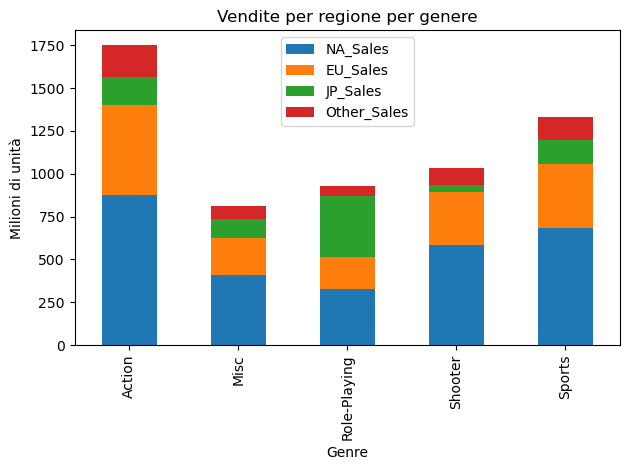


11493


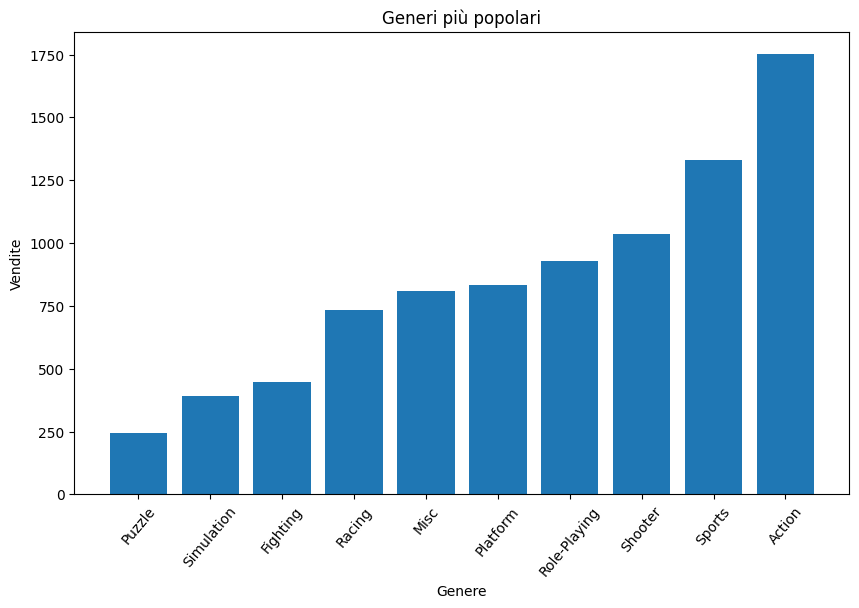

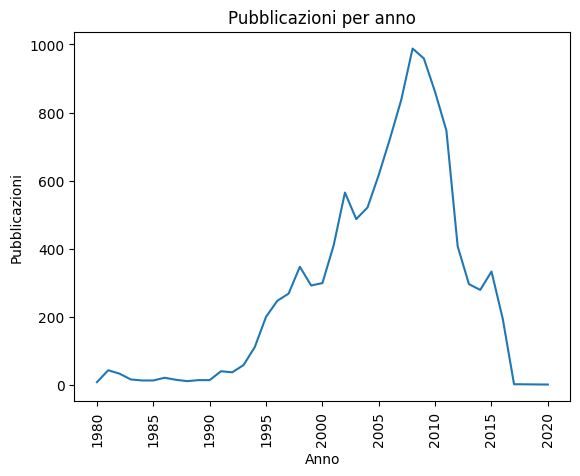

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36


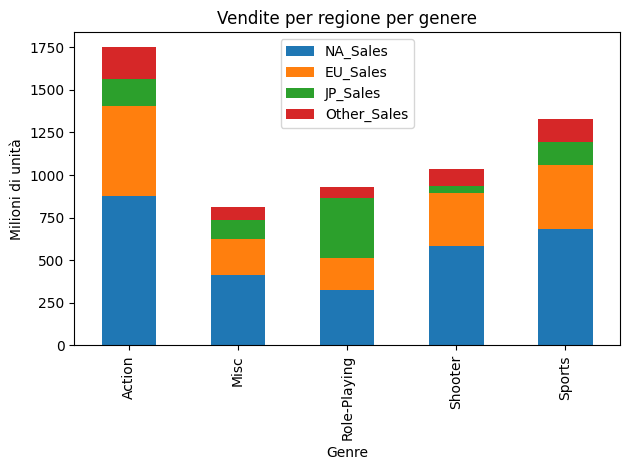

In [70]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()
print(df['Name'].nunique())

sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.bar(sales_by_genre.index[::-1], sales_by_genre.values[::-1])
plt.xlabel('Genere')
plt.ylabel('Vendite')
plt.xticks(rotation=50)
plt.title('Generi più popolari')
plt.show()
df.head()
#evoluzione di numeri di giochi pubblicati nel tempo
pubblicati=df.drop_duplicates(subset=['Name'])
evoluzione= pubblicati.groupby('Year')['Name'].count()
evoluzione
plt.plot(evoluzione.index[::-1],evoluzione.values[::-1])
plt.xlabel('Anno')
plt.ylabel('Pubblicazioni')
plt.title('Pubblicazioni per anno')
plt.xticks(rotation=90)
plt.show()
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
print(sales_by_genre)

# Filtra i generi desiderati
selected_genres = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']
sales_by_genre_2 = sales_by_genre.loc[selected_genres]

# Plot
sales_by_genre_2.plot(kind='bar', stacked=True)
plt.title('Vendite per regione per genere')
plt.xlabel('Genre')
plt.ylabel('Milioni di unità')
plt.legend()
plt.tight_layout()
plt.show()